In [79]:
from data_pre_processing import *
from pair_finder import *
from back_tester import *
import itertools

In [80]:
# prices_sol = pd.read_csv('binance_data/SOL_and_BNSOL/2025/1m/SOLUSDT_2025_1m.csv')
# prices_bnsol = pd.read_csv('binance_data/SOL_and_BNSOL/2025/1m/BNSOLUSDT_2025_1m.csv')



In [81]:
# merge_ohlc_closing_prices('binance_data/ETH_and_WBETH/2024/1m')

# Get Data 
---

In [82]:

#prices = pd.read_csv("binance_data/Staked_ETH_Bybit/merged_closing_prices.csv", index_col=0, parse_dates=True)

#prices = pd.read_csv("binance_data/From_Paper/2023/1m/merged_From_Paper_closing_prices_OCT_NOV.csv", index_col=0, parse_dates=True)

#BTC and WBTC
#-------------------------------------------
#prices = pd.read_csv("binance_data/Wrapped BTC/2024/30m/merged_closing_prices.csv", index_col=0, parse_dates=True)

#prices = pd.read_csv("binance_data/Wrapped BTC/2024/1m/merged_closing_prices.csv", index_col=0, parse_dates=True)


#SOL and BNSOL
#-------------------------------------------
prices = pd.read_csv('binance_data/SOL_and_BNSOL/2025/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

#ETH and WBTC
#-------------------------------------------
#prices = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

In [83]:
prices

,BNSOL/USDT_2025_1m,SOL/USDT_2025_1m
timestamp,,
2025-01-01 00:00:00,194.0,189.71
2025-01-01 00:01:00,194.0,189.71
2025-01-01 00:02:00,194.5,190.07
2025-01-01 00:03:00,194.4,189.86
2025-01-01 00:04:00,194.5,189.85
...,...,...
2025-02-28 23:55:00,153.2,147.79
2025-02-28 23:56:00,153.3,147.89
2025-02-28 23:57:00,153.5,148.10


In [84]:
# prices_ETH = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/ETHUSDT_2024_1m.csv', index_col=0, parse_dates=True)
# prices_WBETH = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/WBETHUSDT_2024_1m.csv', index_col=0, parse_dates=True)   
# prices_WBTC = pd.read_csv('binance_data/Wrapped BTC/2024/1m/WBTCUSDT_2024_1m.csv', index_col=0, parse_dates=True)
# prices_BTC = pd.read_csv('binance_data/Wrapped BTC/2024/1m/BTCUSDT_2024_1m.csv', index_col=0, parse_dates=True)

In [85]:
#get prices for dates greater than or equal to 2024-01-01 16:30:00	

#prices = prices.loc[prices.index >= "2024-01-01 16:30:00"]

# Trading simulation
---

* ## In-Sample Testing

In [86]:
# #XVS/USDT_2024_30m & QI/USDT_2024_30m


# crypto_1 = prices.columns[0]
# crypto_2 = prices.columns[1]

# cointegrated_pairs = [(crypto_1,
#   crypto_2,
#   0.731393,
#   0.8501886494196308,
#   0.22)]

In [87]:
#Params:
window_size = 1440
entry_threshold= 2
exit_threshold= 0
stop_loss_threshold= 3

In [88]:
sym1, sym2 = prices.columns
print(f"\nTesting strategy on pair: {sym1} and {sym2} ...")
S1 = prices[sym1]
S2 = prices[sym2]

# Compute the spread series and beta_series 
spread_series, beta_series, alpha_series = compute_spread_series(S1, S2, window_size)
#print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")

# Compute rolling z-score using the provided helper function.
zscore_series, rolling_mean, rolling_std = compute_rolling_zscore(spread_series, window_size)

# Generate trading signals (positions) based on the spread's z-score
positions, trade_entries, trade_exits = backtest_pair_rolling(spread_series,S1,S2,zscore_series, entry_threshold, exit_threshold, stop_loss_threshold)




Testing strategy on pair: BNSOL/USDT_2025_1m and SOL/USDT_2025_1m ...
Total trades closed: 2644 (Wins=2418, Losses=226)
Win rate: 0.91


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 1.8000e+01,
        6.6000e+01, 5.7400e+02, 4.6010e+03, 2.6845e+04, 3.6398e+04,
        1.1562e+04, 1.7400e+03, 2.2300e+02, 3.0000e+01, 7.0000e+00]),
 array([-29.03376587, -27.83508774, -26.63640961, -25.43773147,
        -24.23905334, -23.04037521, -21.84169708, -20.64301895,
        -19.44434081, -18.24566268, -17.04698455, -15.84830642,
        -14.64962828, -13.45095015, -12.25227202, -11.05359389,
         -9.85491576,  -8.65623762,  -7.45755949,  -6.25888136,
         -5.06020323,  -3.8615251 ,  -2.66284696,  -1.46416883,
         -0.2654907 ,   0.93318743,   2.13186556,   3.3305437 ,
          4.52922183,   5.72789996,   6.92657809]),
 <BarContainer object of 30 artists>)

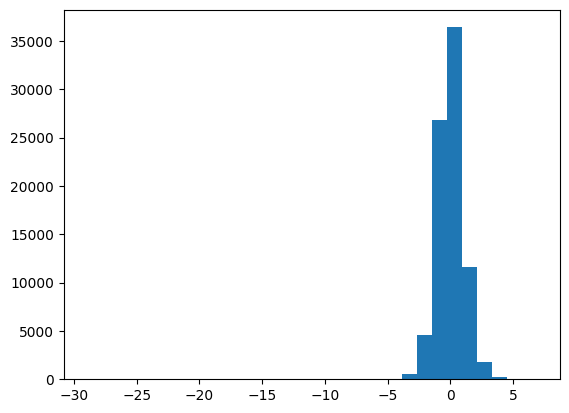

In [89]:
plt.hist(zscore_series, bins=30)

In [90]:
# #Compute normalised difference between the two prices
# normalised_abs_diff = np.abs((S1 - S2) / (S1 + S2))

# #Compute the average normalised difference
# np.mean(normalised_abs_diff)

In [91]:
# #SETH and ETH Distance: 0.0003968226419110906

# s_eth_distance = 0.0003968226419110906
# w_bitcoin_distance = 0.0006442955592394416

# percentage = s_eth_distance/w_bitcoin_distance * 100
# percentage


In [92]:
# sym1

In [93]:
# price_changes_S1_non_zero = [x for x in price_changes_S1 if x != 0]
# price_changes_S2_non_zero = [x for x in price_changes_S2 if x != 0]

# len(price_changes_S2_non_zero)

In [94]:
S1

timestamp
2025-01-01 00:00:00    194.0
2025-01-01 00:01:00    194.0
2025-01-01 00:02:00    194.5
2025-01-01 00:03:00    194.4
2025-01-01 00:04:00    194.5
                       ...  
2025-02-28 23:55:00    153.2
2025-02-28 23:56:00    153.3
2025-02-28 23:57:00    153.5
2025-02-28 23:58:00    153.5
2025-02-28 23:59:00    153.6
Name: BNSOL/USDT_2025_1m, Length: 84960, dtype: float64

In [96]:
initial_capital = 10_000.0
#tx_cost= 0.00031 #0.031% transaction cost
tx_cost= 0.00025 #0.025% transaction cost #Binance level 5 Maker Cost

trade_profits, cumulative_profit_series, entry_times, exit_times = simulate_strategy_trade_pnl(trade_entries, trade_exits, initial_capital, beta_series, tx_cost)

Total trades: 2644
Number of profitable trades (proft > 0): 2419
Number of non-profitable trades (proft < 0): 225
Total return €: 15833.39
Total return %: 158.33%
Long spread losses: 102, Short spread losses: 123
Number of Dual-leg profitable trades: 959
Dual leg trade profit rate: 36.27%


In [ ]:
#Most profitable trade


[{'time': Timestamp('2025-01-03 00:16:00'),
  'S1': np.float64(213.1),
  'S2': np.float64(207.91),
  'z': np.float64(3.642094628617388),
  'position': -1},
 {'time': Timestamp('2025-01-03 00:32:00'),
  'S1': np.float64(212.6),
  'S2': np.float64(207.58),
  'z': np.float64(2.346951236440299),
  'position': -1},
 {'time': Timestamp('2025-01-03 00:41:00'),
  'S1': np.float64(212.5),
  'S2': np.float64(207.31),
  'z': np.float64(3.652904049473324),
  'position': -1},
 {'time': Timestamp('2025-01-03 00:46:00'),
  'S1': np.float64(212.4),
  'S2': np.float64(207.34),
  'z': np.float64(2.6279516783110486),
  'position': -1},
 {'time': Timestamp('2025-01-03 01:08:00'),
  'S1': np.float64(211.2),
  'S2': np.float64(206.21),
  'z': np.float64(2.0183832669435535),
  'position': -1},
 {'time': Timestamp('2025-01-03 01:37:00'),
  'S1': np.float64(210.8),
  'S2': np.float64(205.78),
  'z': np.float64(2.2439525271203276),
  'position': -1},
 {'time': Timestamp('2025-01-03 01:50:00'),
  'S1': np.float6

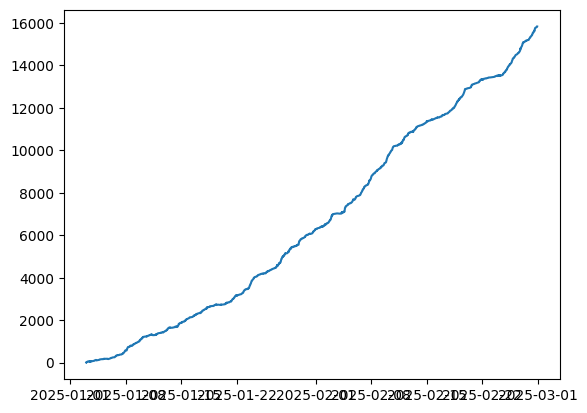

In [97]:
plt.plot(cumulative_profit_series)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   1.,
          2.,   3.,   0.,   3.,   1.,   3.,   8.,   4.,  11.,  15.,  12.,
         24.,  26.,  28.,  23.,  14.,  12.,  11.,  11.,   4.,   1.,   1.,
          1.,   1.,   0.,   0.,   2.,  15.,  44.,  97., 135., 174., 174.,
        188., 204., 171., 160., 150., 147., 107., 116.,  95.,  73.,  56.,
         55.,  56.,  31.,  22.,  30.,  19.,  15.,  17.,  15.,  11.,   6.,
          6.,   2.,   2.,   3.,   2.,   1.,   5.,   1.,   0.,   1.,   1.,
          1.,   2.,   4.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([-32.89795295, -32.21749634, -31.53703973, -30.85658312,
        -30.17612651, -29.4956699 , -28.81521329, -28.13475668,
        -27.45430007, -26.77384346, -26.09338685, -25.41293024,
        -24.73247363, -24.05201703, -23.37156042, -22.69110381,
        -22.0106472 , -21.33019059, -20.64973398, -19.96927737

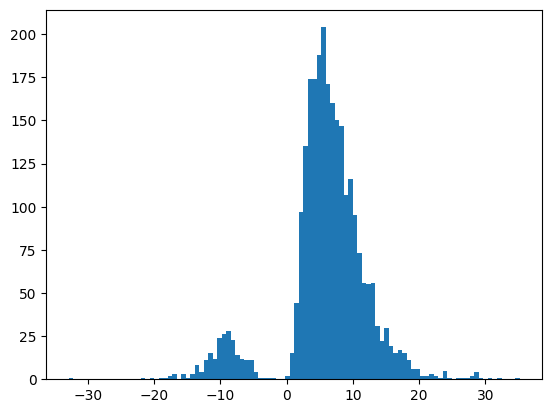

In [98]:
plt.hist(trade_profits, bins=100)

In [99]:
#Filter for negative values

trade_profits_neg = [x for x in trade_profits if x < 0]
print(f"Average trade loss:  € {np.mean(trade_profits_neg)}")

trade_profits_pos = [x for x in trade_profits if x > 0]
print(f"Average trade win:  € {np.mean(trade_profits_pos)}")

print("Number of negative profits(profits that were less than the transaction cost): ", len(trade_profits_neg))
print("Number of positive profits (profits that were greater than the transaction cost): ", len(trade_profits_pos))



Average trade loss:  € -9.552550268547561
Average trade win:  € 7.433946735143979
Number of negative profits(profits that were less than the transaction cost):  225
Number of positive profits (profits that were greater than the transaction cost):  2419


In [100]:
# #Calculate returns based on the trade profits
# trade_profits = np.array(trade_profits)
# returns = trade_profits/initial_capital * 100

# #Plot the returns
# plt.hist(returns, bins=50, edgecolor='black')
# plt.xlabel('Returns (%)')   
# plt.ylabel('Frequency')
# plt.title(f'Returns Distribution for Pair {sym1} and {sym2}') 

In [101]:
# #Calculate percentage price changes for each asset
# price_changes_S1 = np.array(price_changes_S1)

In [102]:
# #Obtain non-zero price changes
# price_changes_S1_non_zero = [x for x in price_changes_S1 if x != 0]
# price_changes_S2_non_zero = [x for x in price_changes_S2 if x != 0]

# #Convert price changes to percentage
# price_changes_S1_non_zero_percent = [(x*100) for x in price_changes_S1_non_zero]
# price_changes_S2_non_zero_percent = [(x*100) for x in price_changes_S2_non_zero]

# #Print average price changes
# print(f"Average price change S1: {np.mean(price_changes_S1_non_zero_percent)} %", f"Average price change S1: {np.mean(price_changes_S2_non_zero_percent)} %")
# print(f"Number of trades: {len(price_changes_S1_non_zero)}")

In [103]:
# percentage_return = cumulative_profit_series[-1]/initial_capital * 100
# print(f"Percentage return: {percentage_return:.2f} %")


# #PROFIT SHOULD BE 0.15 EUR

# plt.figure(figsize=(10,6))
# plt.plot(cumulative_profit_series)
# plt.title('Cumulative PnL')
# plt.xlabel('Time')
# plt.ylabel('PnL (EUR)')
# plt.show()

Number of trade entries: 3
Number of trade exits: 3
Total paired trades: 3
Trades in window:
Trade 1 : 2025-02-01 00:16:00 to 2025-02-01 00:18:00 (win)
Trade 2 : 2025-02-01 00:55:00 to 2025-02-01 01:07:00 (win)
Trade 3 : 2025-02-01 01:55:00 to 2025-02-01 01:56:00 (loss)


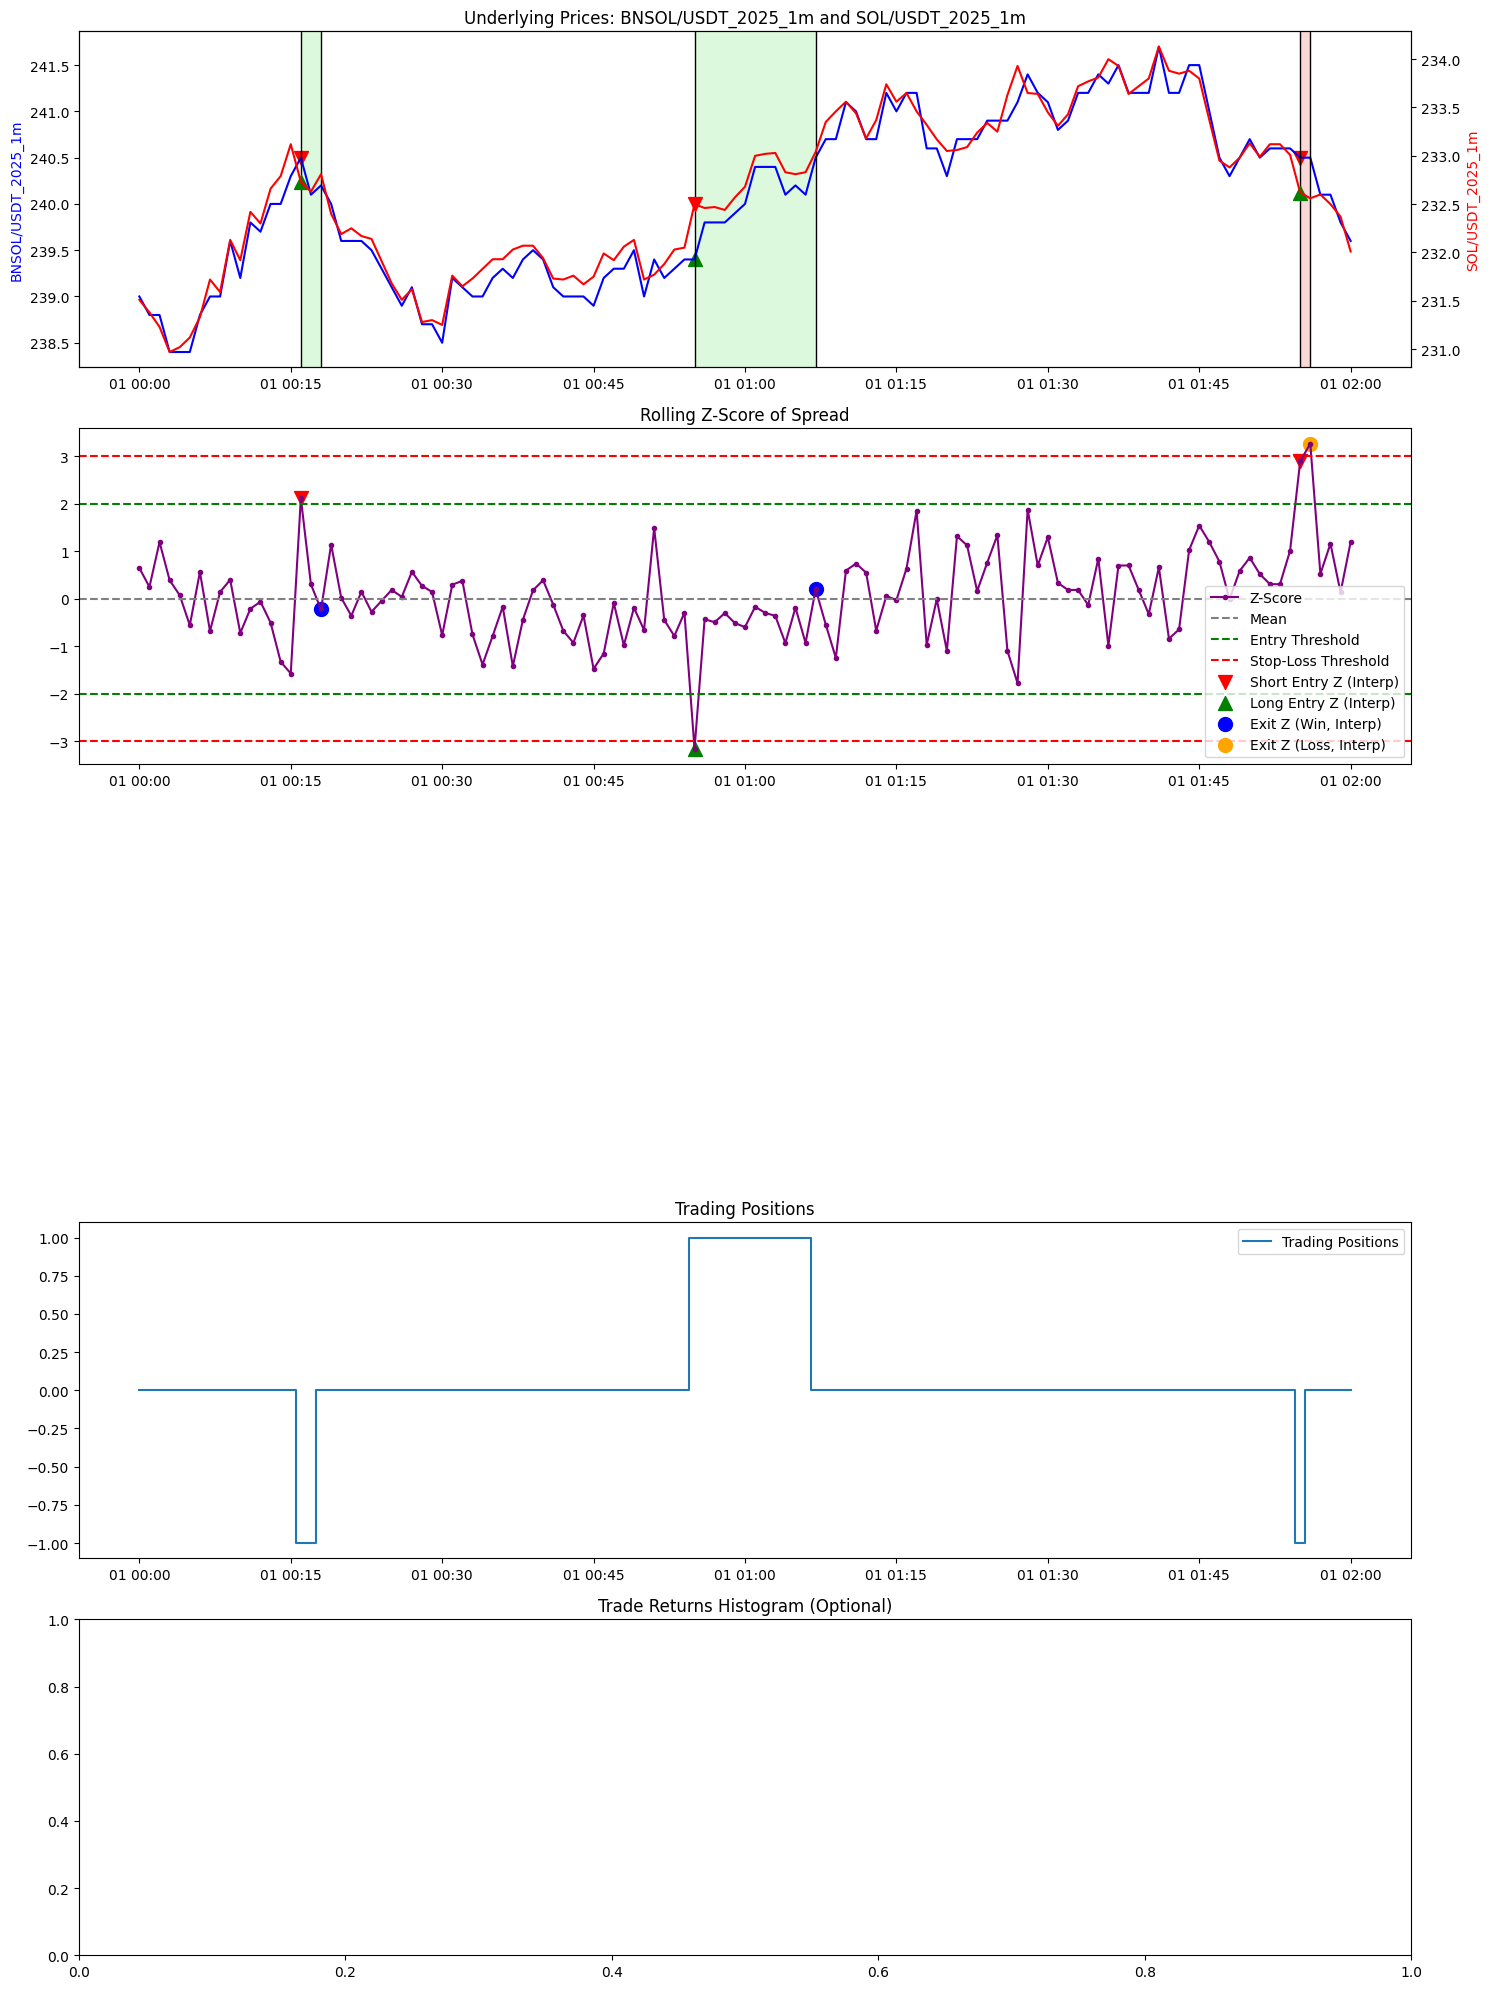

In [104]:
#Plot trading simulation

window_start = pd.to_datetime('2025-02-01 00:00:00')
window_end = pd.to_datetime('2025-02-01 2:00:00')


# window_start = pd.to_datetime('2024-02-01 2:00:00')
# window_end = pd.to_datetime('2024-02-01 5:00:00')


# window_start = None
# window_end = None

#NOTE THAT THE TIMES ON THE X AXIS SHOW THE HOURS AND MINUTES

plot_trading_simulation(
    S1, 
    S2, 
    sym1, 
    sym2, 
    zscore_series, 
    positions, 
    entry_threshold,
    stop_loss_threshold,
    trade_entries=trade_entries,  # list of dicts: { 'time', 'S1', 'S2', 'z', 'position' }
    trade_exits=trade_exits,    # list of dicts: { 'time', 'S1', 'S2', 'z', 'exit_type' }
    window_start=window_start,
    window_end=window_end
)



In [105]:
#Zip trade entries and exits
trade_entries_exits = list(zip(trade_entries, trade_exits))
trade_entries_exits

[({'time': Timestamp('2025-01-03 00:16:00'),
   'S1': np.float64(213.1),
   'S2': np.float64(207.91),
   'z': np.float64(3.642094628617388),
   'position': -1},
  {'time': Timestamp('2025-01-03 00:22:00'),
   'S1': np.float64(212.3),
   'S2': np.float64(207.61),
   'z': np.float64(-0.19444982006078843),
   'exit_type': 'win'}),
 ({'time': Timestamp('2025-01-03 00:32:00'),
   'S1': np.float64(212.6),
   'S2': np.float64(207.58),
   'z': np.float64(2.346951236440299),
   'position': -1},
  {'time': Timestamp('2025-01-03 00:40:00'),
   'S1': np.float64(212.3),
   'S2': np.float64(207.65),
   'z': np.float64(-0.5063365431002685),
   'exit_type': 'win'}),
 ({'time': Timestamp('2025-01-03 00:41:00'),
   'S1': np.float64(212.5),
   'S2': np.float64(207.31),
   'z': np.float64(3.652904049473324),
   'position': -1},
  {'time': Timestamp('2025-01-03 00:45:00'),
   'S1': np.float64(212.0),
   'S2': np.float64(207.47),
   'z': np.float64(-1.4279627864984228),
   'exit_type': 'win'}),
 ({'time': T

In [106]:
z = 0.1

if z < -0:
    print("Short")

In [107]:


# #Get prices at the start and end of the first trade
# S1_price_start = S1[entry_indices]
# S2_price_start = S2[entry_indices]

# S1_price_end = S1.loc[exit_indices]
# S2_price_end = S2.loc[exit_indices]


# #Calculate the price changes by converting the series to numpy arrays
# S1_price_start = S1_price_start.to_numpy()
# S2_price_start = S2_price_start.to_numpy()

# S1_price_end = S1_price_end.to_numpy()
# S2_price_end = S2_price_end.to_numpy()

# print("BEFORE ALIGNMENT")

# #Make sure the arrays have the same shape
# print(S1_price_start.shape)
# print(S2_price_start.shape)


# print(S1_price_end.shape)
# print(S2_price_end.shape)


# if S1_price_start.shape > S1_price_end.shape:
#     S1_price_start = S1_price_start[:len(S1_price_end)]

# if S2_price_start.shape > S2_price_end.shape:
#     S2_price_start = S2_price_start[:len(S2_price_end)]
 
# print("AFTER ALIGNMENT")

# #Make sure the arrays have the same shape
# print(S1_price_start.shape)
# print(S2_price_start.shape)

# print(S1_price_end.shape)
# print(S2_price_end.shape)

# #Get the price changes
# S1_price_change = S1_price_end - S1_price_start
# S2_price_change = S2_price_end - S2_price_start

# #Get percentage price changes
# S1_price_change_percent = S1_price_change/S1_price_start * 100
# S2_price_change_percent = S2_price_change/S2_price_start * 100

# #Get absolute percentage price changes
# S1_price_change_percent_abs = np.abs(S1_price_change_percent)
# S2_price_change_percent_abs = np.abs(S2_price_change_percent)


# print(f"Average absolute S1 price change percent: {np.mean(S1_price_change_percent_abs):.2f}%")
# print(f"Average absolute S2 price change percent: {np.mean(S2_price_change_percent_abs):.2f}%")

# print(f"Average of average absolute price changes: {(np.mean(S1_price_change_percent_abs) + np.mean(S2_price_change_percent_abs))/2:.2f}%")



# # #Get the price changes
# # S1_price_change = S1_price_end - S1_price_start
# # S2_price_change = S2_price_end - S2_price_start


In [108]:
#Print average S1 price change percent rounded to 2 decimal places

#Average Absolute Percentage Reversion
#---------------------------------------


In [109]:

def calculate_avg_abs_pct_reversion(trade_entries, trade_exits):
    """
    Calculate the average absolute percentage reversion from trade entry to trade exit
    for both asset price series (S1 and S2), using the interpolated trade data.
    
    Args:
        trade_entries (list): List of dictionaries for trade entries.
            Each dict should have keys: 'time', 'S1', 'S2', 'z', 'position'
        trade_exits (list): List of dictionaries for trade exits.
            Each dict should have keys: 'time', 'S1', 'S2', 'z', 'exit_type'
    
    Returns:
        overall_avg (float): The average of the average absolute percentage changes for S1 and S2.
    """
    S1_pct_changes = []
    S2_pct_changes = []
    
    # Loop over paired trade entries and exits.
    for entry, exit in zip(trade_entries, trade_exits):
        entry_S1 = entry['S1']
        entry_S2 = entry['S2']
        exit_S1 = exit['S1']
        exit_S2 = exit['S2']
        
        # Calculate absolute percentage change for each asset.
        pct_change_S1 = np.abs((exit_S1 - entry_S1) / entry_S1 * 100)
        pct_change_S2 = np.abs((exit_S2 - entry_S2) / entry_S2 * 100)
        
        S1_pct_changes.append(pct_change_S1)
        S2_pct_changes.append(pct_change_S2)
    
    # Compute the average absolute percentage change for S1 and S2.
    avg_abs_S1 = np.mean(S1_pct_changes) if S1_pct_changes else 0
    avg_abs_S2 = np.mean(S2_pct_changes) if S2_pct_changes else 0
    
    # Overall average is the average of the two.
    overall_avg = (avg_abs_S1 + avg_abs_S2) / 2
    
    print(f"Average absolute S1 price change percent: {avg_abs_S1:.2f}%")
    print(f"Average absolute S2 price change percent: {avg_abs_S2:.2f}%")
    print(f"Average of average absolute price changes: {overall_avg:.2f}%")
    
    return overall_avg



In [110]:
overall_avg_reversion = calculate_avg_abs_pct_reversion(trade_entries, trade_exits)

Average absolute S1 price change percent: 0.29%
Average absolute S2 price change percent: 0.21%
Average of average absolute price changes: 0.25%
